<a href="https://colab.research.google.com/github/ibk25244/su-ai/blob/master/10_3(colab)_Korean_text_analysis_visualization_3_movie_data_exploration_my.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- - -

<font size=6 color='tomato'>한글 텍스트 분석 및 시각화 - <font color='royalblue'>3 단계 : 데이터 탐색</font>   
<font size=5 color='purple'>Korean Text Analysis & Visualization - <font color='forestgreen'>Step 3: Data Exploration</font>

* * *

**<font size=4>박 진 수</font>** 교수  
Intelligent Data Semantics Lab  
Seoul National University

- - -

>[텍스트 분석 절차](#scrollTo=IZPdlBpJO2wQ)

>[저장한 파일을 불러온다.](#scrollTo=jtGf6Uk9itCj)

>>[(방법 1) 로컬 파일 업로드 하여 열기](#scrollTo=D0uivRGO6l5V)

>>[(방법 2) 데이터 파일 내려받아 열기](#scrollTo=PjAWBCyc69Yj)

>[자주 출현하는 단어 추출하기](#scrollTo=B7Nft3hQO2wY)

>[워드클라우드 그리기](#scrollTo=3nN_XDHFO2wd)

>>[wordcloud](#scrollTo=_QnYMdsTO2we)

>>[pytagcloud](#scrollTo=OMOyBBkMO2wq)

>[THE END](#scrollTo=7np3U1BPO2wu)



# 텍스트 분석 절차

**1** 단계 - **데이터 수집**
- 웹, SNS 등에서 분석에 필요한 데이터를 수집한다.
- 이미 데이터가 있으면 이 단계는 생략할 수 있다.

**2** 단계 - **데이터 전처리**
- 자연어를 기계가 이해할 수 있는 인공어(artificial language)로 번역한다.
- Tokenization, POS Tagging(형태소 분석), Pruning 등 

**<font size='+3'>3 단계 - 데이터 탐색</font>**
- 분석의 방향성을 제시하기 위해 전처리한 데이터를 탐색한다.
- 일반적으로는 단어의 출현 빈도(frequency)를 기반으로 탐색한다.

**4** 단계 - **데이터 분석**
- 텍스트 데이터를 통해 유의미한 정보를 추출하는 분석을 수행한다.
- 감성분석, 토픽모델, 머신러닝 등

**5** 단계 - **인사이트 도출**
- 경영 환경에서 효과적인 의사 결정에 도움을 줄 수 있는 인사이트를 도출한다.

# 저장한 파일을 불러온다.

## (방법 1) 로컬 파일 업로드 하여 열기




In [5]:
# ===== 만약 파일을 로컬 파일로 저장했다면 =============================================
# --- Importing a local file
from google.colab import files

# 앞서 전처리한 파일('movie-reviews-A-corpus.txt')을 업로드 한다.
# movie-reviews-begin-again-corpus.txt 파일을 업로드한다.
uploaded = files.upload()

# 업로드한 파일을 읽어서 메모리에 저장한다.
text = uploaded[tuple(uploaded)[0]].decode('utf-8').splitlines()

Saving movie-reviews-A-corpus.txt to movie-reviews-A-corpus (1).txt


## (방법 2) 데이터 파일 내려받아 열기

실습을 위해 저장해둔 파일을 내려받도록 한다.

In [ ]:
!wget -q --show-progress --no-check-certificate https://raw.githubusercontent.com/snu-ds/data/master/movie-reviews-begin-again-corpus.txt

# 파일을 읽어서 메모리에 저장한다.
text = open('movie-reviews-begin-again-corpus.txt', mode='r', 
            encoding='utf-8').read().splitlines()

# 자주 출현하는 단어 추출하기

In [6]:
text[:5]

['',
 '풍자가 훌륭했어요. 한편 우리 현실이 생각나서 씁쓸하기도 하고',
 '감동적이었어요!!!',
 '다시금 주변국에 의해 좌지우지 되지 않도록 힘을 키워야겠다는 생각이 드네요',
 '감동깊게 잘보고 왔읍니다. 평일조조 이지만 사람이 많았어요. 일산에서 우리나라의 미래를 보는듯 합니다. 평화 통일']

In [7]:
# ======= 형태소 분석을 위해 한글 분석 모듈 konlpy를 설치한다. =============
!python -m pip install konlpy

In [8]:
import konlpy 
print('KoNLPy version...:', konlpy.__version__)

KoNLPy version...: 0.5.2


In [9]:
# 한국어 텍스트 분석에 필요한 모듈(konlpy)의 
# Open Korean Text 형태소 분석기를 불러온다.
from konlpy.tag import Okt 
okt = Okt()

In [11]:
# 전체 텍스트를 형태소(Part-of-Speech) 분석을 한다.
# 토큰을 정규화하고 어간 단위로 구분한다.
# 형태소 분석 결과는 ('단어', '품사 태그')의 튜플로 반환한다.
pos_tags = [okt.pos(line) for line in text]

In [12]:
pos_tags[:5]

[[],
 [('풍자', 'Noun'),
  ('가', 'Josa'),
  ('훌륭했어요', 'Adjective'),
  ('.', 'Punctuation'),
  ('한편', 'Noun'),
  ('우리', 'Noun'),
  ('현실', 'Noun'),
  ('이', 'Josa'),
  ('생각나서', 'Verb'),
  ('씁쓸하기도', 'Adjective'),
  ('하고', 'Verb')],
 [('감동', 'Noun'), ('적', 'Suffix'), ('이었어요', 'Verb'), ('!!!', 'Punctuation')],
 [('다시금', 'Noun'),
  ('주', 'Modifier'),
  ('변국', 'Noun'),
  ('에', 'Josa'),
  ('의해', 'Adjective'),
  ('좌지우지', 'Noun'),
  ('되지', 'Verb'),
  ('않도록', 'Verb'),
  ('힘', 'Noun'),
  ('을', 'Josa'),
  ('키워야겠다는', 'Verb'),
  ('생각', 'Noun'),
  ('이', 'Josa'),
  ('드네', 'Noun'),
  ('요', 'Josa')],
 [('감동', 'Noun'),
  ('깊게', 'Adjective'),
  ('잘', 'VerbPrefix'),
  ('보고', 'Verb'),
  ('왔', 'Verb'),
  ('읍니', 'Noun'),
  ('다', 'Josa'),
  ('.', 'Punctuation'),
  ('평일', 'Noun'),
  ('조조', 'Noun'),
  ('이지만', 'Josa'),
  ('사람', 'Noun'),
  ('이', 'Josa'),
  ('많았어요', 'Adjective'),
  ('.', 'Punctuation'),
  ('일산', 'Noun'),
  ('에서', 'Josa'),
  ('우리나라', 'Noun'),
  ('의', 'Josa'),
  ('미래', 'Noun'),
  ('를', 'Josa'),
  ('보는듯',

In [13]:
# 전체 텍스트에서 명사(Noun)와 형용사(Adjective)만 걸러낸다.
noun_adj_list = [token for line in pos_tags 
                          for token, tag in line 
                              if tag in ['Noun', 'Adjective']]

In [14]:
noun_adj_list[:5]

['풍자', '훌륭했어요', '한편', '우리', '현실']

In [15]:
# 리뷰에서 사용한 고유한 명사와 형용사 개수를 확인한다. 
len(noun_adj_list)

22625

In [17]:
# collections 패키지에서 Counter(등장 횟수를 세주는 역할)를 불러온다.
from collections import Counter	

# Counter에 noun_adj_list list를 넣어 서로 다른 명사와 형용사가 얼마나 많이 쓰였는지를 셈한다.
counts = Counter(noun_adj_list)
len(counts)

4760

TypeError: ignored

In [19]:
# 전체 텍스트에서 가장 많이 사용된 명사와 형용사만 출력한다.
counts.most_common(10)

[('영화', 953),
 ('잠수함', 212),
 ('현실', 211),
 ('대통령', 192),
 ('정우성', 185),
 ('생각', 183),
 ('배우', 181),
 ('연기', 171),
 ('우리', 150),
 ('것', 137)]

# 워드클라우드 그리기

## wordcloud

In [20]:
from konlpy.tag import Okt  # 한국어 텍스트 분석에 필요한 모듈(konlpy)의 Open Korean Text 형태소 분석기를 불러온다.

# Open Korean Text 형태소 분석기 객체를 생성한다.
okt = Okt() 
    
# text의 각 문장을 꺼낸 후 형태소 붆석기를 통해 
# 명사만 추려내 리스트에 담는다.
nouns = [noun for s in text for noun in okt.nouns(s)]

In [21]:
from collections import Counter

# nouns 리스트에 있는 서로 다른 명사의 개수 구한다. 
count = Counter(nouns)

In [22]:
count

Counter({'풍자': 10,
         '한편': 8,
         '우리': 150,
         '현실': 211,
         '감동': 75,
         '다시금': 4,
         '변국': 14,
         '좌지우지': 1,
         '힘': 13,
         '생각': 183,
         '드네': 4,
         '읍니': 3,
         '평일': 1,
         '조조': 9,
         '사람': 85,
         '일산': 1,
         '우리나라': 93,
         '미래': 12,
         '평화': 49,
         '통일': 83,
         '만': 37,
         '영화': 953,
         '감독': 63,
         '공부': 5,
         '듯': 51,
         '오락': 22,
         '성도': 7,
         '이': 124,
         '인간': 12,
         '몰래': 2,
         '유니클로': 1,
         '정말': 125,
         '번': 17,
         '일본': 77,
         '총리': 4,
         '꽃미남': 1,
         '배우': 181,
         '등장': 6,
         '열': 4,
         '여러가지': 2,
         '것': 137,
         '사실': 34,
         '불구': 1,
         '상영': 6,
         '시간': 74,
         '전혀': 20,
         '정우성': 185,
         '매력': 6,
         '수': 85,
         '나중': 3,
         '김정은': 35,
         '유엔': 1,
         '사무': 1,
   

In [23]:
# 가장 자주 출현하는 명사 100개를 추출한다.
data = count.most_common(100)

In [24]:
data

[('영화', 953),
 ('잠수함', 212),
 ('현실', 211),
 ('대통령', 192),
 ('정우성', 185),
 ('생각', 183),
 ('배우', 181),
 ('연기', 171),
 ('우리', 150),
 ('것', 137),
 ('정말', 125),
 ('이', 124),
 ('강철', 121),
 ('점', 121),
 ('기대', 119),
 ('비', 119),
 ('북한', 117),
 ('재미', 109),
 ('더', 102),
 ('한반도', 101),
 ('보고', 101),
 ('볼', 97),
 ('미국', 94),
 ('좀', 94),
 ('우리나라', 93),
 ('정치', 92),
 ('평점', 88),
 ('사람', 85),
 ('수', 85),
 ('통일', 83),
 ('상황', 83),
 ('액션', 79),
 ('유연석', 78),
 ('일본', 77),
 ('마지막', 76),
 ('감동', 75),
 ('진짜', 75),
 ('시간', 74),
 ('긴장감', 74),
 ('꼭', 72),
 ('감', 71),
 ('곽도원', 69),
 ('최고', 67),
 ('스토리', 67),
 ('신정근', 66),
 ('대한민국', 66),
 ('몰입', 65),
 ('감독', 63),
 ('그냥', 63),
 ('편', 62),
 ('테러', 60),
 ('말', 60),
 ('씬', 59),
 ('내용', 59),
 ('한국', 57),
 ('국뽕', 54),
 ('장면', 54),
 ('정도', 52),
 ('듯', 51),
 ('정세', 51),
 ('평화', 49),
 ('안', 49),
 ('그', 49),
 ('나라', 49),
 ('중간', 48),
 ('돈', 48),
 ('애', 48),
 ('반도', 47),
 ('부분', 46),
 ('왜', 46),
 ('초반', 45),
 ('아주', 44),
 ('지금', 44),
 ('중', 43),
 ('완전', 43),
 ('도', 41)

In [25]:
# --- 한글 워드 클라우드를 그리기 위해 한글 폰트를 설치한다.
# 한글 폰트를 설치한다.
!apt -qq -y install fonts-nanum
 
# 나눔바른고딕(NanumBarunGothic)을 사용하기 위해 경로를 포함시킨다.
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [26]:
from wordcloud import WordCloud

wordcloud = WordCloud(
  font_path=fontpath,
  relative_scaling=0.2,
  background_color='white',
).generate_from_frequencies(dict(data))

wordcloud

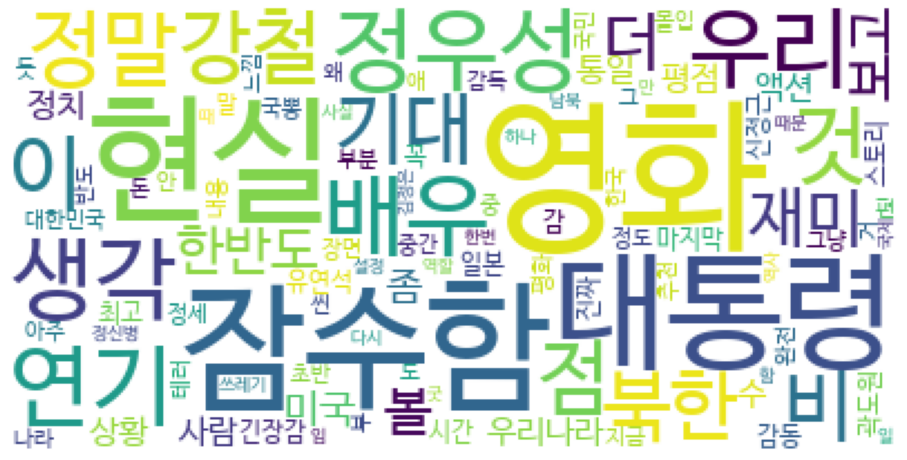

In [27]:
from matplotlib import pyplot

pyplot.figure(figsize=(16, 10))  # width, height in inches
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()

## pytagcloud

&#9658; <font color='red'>[참고] 아래 코드를 실행하기 위해서는 pycloudtag와 관련 한글 폰트 'Noto Sans CJK'가 사전에 설치되어 있어야 한다.</font>

In [ ]:
# --- 워드클라우드 관련 모듈 설치 --------------------------------- #
# pygame과 simplejson 설치
!python -m pip install --upgrade pygame 
!python -m pip install --upgrade simplejson 

# pytagcloud에 한국어 폰트가 추가된 버전을 설치
!pip install git+https://github.com/e9t/PyTagCloud.git

In [ ]:
from konlpy.tag import Okt  
from collections import Counter
import random

# --- wordcloud 생성에 필요한 함수 정의를 정의한다.
def get_tags(text, ntags=100, multiplier=1):
  '''워드클라우드를 그리기 위한 명사 태그와 그 빈도수, 그리고 색깔을 생성한다.
  
  Args:
    text (list | tuple): 텍스트를 담고 있는 리스트나 튜플
    ntags (int): 생성할 태그의 개수(기본값은 100)
    multiplier (int): 상대적인 크기 상수(기본값은 1)
  Returns:
      list[dict]: 색, 총 태그 개수, 사이즈의 딕셔너리를 담고 있는 리스트
  '''
  okt = Okt() # Open Korean Text 형태소 분석기 객체를 생성한다.
  
  # 리스트 또는 튜플 자료형인 text의 각 문장을 꺼낸 후 
  # 형태소 붆석기를 통해 명사만 추려내 리스트에 담는다.
  nouns = [noun for sent in text 
                  for noun in okt.nouns(sent)]
  
  # nouns 리스트에 있는 서로 다른 명사의 개수 구한다. 
  count = Counter(nouns)    

  # --- 워드 클라우드에 사용할 단어들의 색깔을 무작위로 구성한다.
  # 람다 함수로 0부터 254 사이의 임이의 정수를 추출한다.
  rgb = lambda: random.randint(0, 255)
  # 람다 함수 rgb 3개를 합쳐 RGB 색을 지정하는 새로운 람다 함수를 생성한다.
  color = lambda: (rgb(), rgb(), rgb())

  return [{'color': color(), 'tag': n, 'size': c * multiplier}
            for n, c in count.most_common(ntags)]

In [ ]:
# 위에서 정의한 get_tags() 이용해 가장 많이 사용한 명사 100개를 추출한다.
tags = get_tags(text)
len(tags)

In [ ]:
tags[:5]

[pytagcloud](https://pypi.org/project/pytagcloud/)

- PyTagCloud allows us to create simple tag clouds.

In [ ]:
import pytagcloud

filename = 'wordcloud.png'
size = 1200, 1000   # width, height
fontname = 'Noto Sans CJK'

# pytagcloud 모듈의 함수로 워드클라우드 이미지를 생성한다(png 형식)
pytagcloud.create_tag_image(__TODO__)

In [ ]:
# 가장 자주 출현한 단어 2개('영화', '음악')을 제외한 워드 클라우드를 그린다.
del tags[:2]

filename2 = 'wordcloud2.png'
size = 1000, 600   # width, height
fontname = 'Noto Sans CJK'

# pytagcloud 모듈의 함수로 워드클라우드 이미지를 생성한다(png 형식)
pytagcloud.create_tag_image(__TODO__)

In [ ]:
# ======= For Google Colaboratory ===============================
# --- 수집한 데이터와 전처리한 데이터를 로컬 파일로 내려받기를 한다.
from google.colab import files
files.download(filename)
files.download(filename2)

- - -
# <font color='red'>THE END</font>